In [171]:
# Preliminaries needed for Python and to run R within a Python notebook
import rpy2.rinterface
%load_ext rpy2.ipython 

## Instagram Factorial  Example

Here we want to understand how engagement is influenced jointly and marginally by ad type and ad frequency. As a secondary goal we will to determine which experimental condition is optimal. These questions can be answered with plots, pairwise tests and a linear regression analysis.

### First in Python

In [172]:
## Import necessary libraries and load the data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.graphics.factorplots as smfp
import statsmodels.api as sm

os.chdir("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 6")
insta = pd.read_csv("instagram-factorial.csv")

In [183]:
## Look at a summary of the data
insta.describe()

,Time,Frequency,Type
count,8000.000000,8000.000000,8000.000000
mean,4.502125,1.500000,1.500000
std,2.302384,1.118104,0.500031
min,0.001670,0.000000,1.000000
25%,2.324360,0.750000,1.000000
50%,4.866099,1.500000,1.500000
75%,6.280480,2.250000,2.000000
max,10.069342,3.000000,2.000000


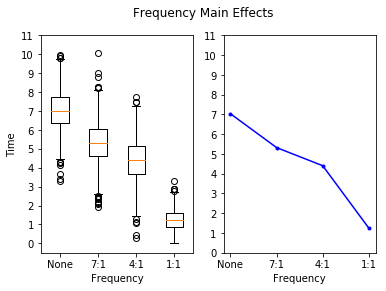

In [152]:
## Frequency Main Effect Plots
plt.subplot(1,2,1)
yf1 = insta[insta["Frequency"]==0]["Time"]
yf2 = insta[insta["Frequency"]==1]["Time"]
yf3 = insta[insta["Frequency"]==2]["Time"]
yf4 = insta[insta["Frequency"]==3]["Time"]
yf = [yf1, yf2, yf3, yf4]
plt.boxplot(yf, labels = ["None", "7:1", "4:1", "1:1"])
plt.xlabel("Frequency")
plt.ylabel("Time")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.subplot(1,2,2)
me_freq = insta.groupby('Frequency')['Time'].agg('mean')
plt.plot(me_freq, color = "blue", marker = ".")
plt.xlabel("Frequency")
plt.xticks([0,1,2,3], ['None', '7:1', '4:1', '1:1'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.suptitle("Frequency Main Effects")
plt.show()

In [169]:
# Aggregated Frequency Means
print("No ads --", np.round(np.mean(yf1), 2))
print("7:1 frequency --", np.round(np.mean(yf2), 2))
print("4:1 frequency --", np.round(np.mean(yf3), 2))
print("1:1 frequency --", np.round(np.mean(yf4), 2))

No ads -- 7.03
7:1 frequency -- 5.32
4:1 frequency -- 4.41
1:1 frequency -- 1.25


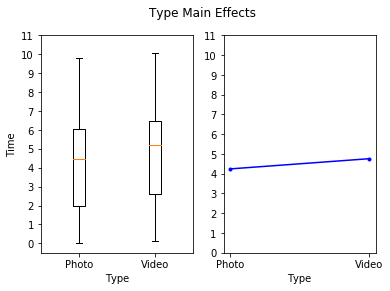

In [156]:
## Type Main Effect Plots
plt.subplot(1,2,1)
yt1 = insta[insta["Type"]==1]["Time"]
yt2 = insta[insta["Type"]==2]["Time"]
yt = [yt1, yt2]
plt.boxplot(yt, labels = ["Photo", "Video"])
plt.xlabel("Type")
plt.ylabel("Time")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.subplot(1,2,2)
me_type = insta.groupby('Type')['Time'].agg('mean')
plt.plot(me_type, color = "blue", marker = ".")
plt.xlabel("Type")
plt.xticks([1,2], ['Photo', 'Video'])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11])

plt.suptitle("Type Main Effects")
plt.show()

In [159]:
# Aggregated Time Means
print("Photo --", np.round(np.mean(yt1), 2))
print("Video --", np.round(np.mean(yt2), 2))

Photo -- 4.25
Video -- 4.76


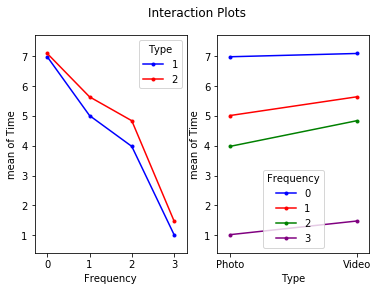

In [162]:
## Interaction Plots
fig, (ax, ax2) = plt.subplots(1,2)

ieplt1 = smfp.interaction_plot(x = insta['Frequency'], trace = insta['Type'], response = insta['Time'], colors = ['blue', 'red'], ax = ax)
plt.xticks([0,1,2,3], ['None', '7:1', '4:1', '1:1'])

ieplt2 = smfp.interaction_plot(x = insta['Type'], trace = insta['Frequency'], response = insta['Time'], colors = ['blue', 'red', 'green', 'purple'], ax = ax2)
plt.xticks([1,2], ['Photo', 'Video'])

plt.suptitle("Interaction Plots")
plt.show()

In [170]:
## Marginal Time Means
insta.groupby(['Type','Frequency'])['Time'].agg('mean')

Type  Frequency
1     0            6.977854
      1            5.008560
      2            3.975815
      3            1.019292
2     0            7.087786
      1            5.636176
      2            4.834985
      3            1.476534
Name: Time, dtype: float64

In [144]:
## Linear model to evaluate the significance of main and interaction effects
model = smf.ols('Time ~ C(Frequency)*C(Type)', data = insta).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     6455.
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        11:55:21   Log-Likelihood:                -10442.
No. Observations:                8000   AIC:                         2.090e+04
Df Residuals:                    7992   BIC:                         2.096e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
Intercept                          6.9779      0.028    247.104      0.000         6.922     7.033
C(Frequency)[T.1]                 -1.9693      0.040    -49.312      0.000        -2.048    -1.891
C(Frequency)[T.2]                 -3.0020      0.040    -75.173      0.000        -3.080    -2.924
C(Frequency)[T.3]                 -5.9586      0.040   -149.206      0.000        -6.037    -5.880
C(Type)[T.2]                       0.1099      0.040      2.753      0.006         0.032     0.188
C(Frequency)[T.1]:C(Type)[T.2]     0.5177      0.056      9.166      0.000         0.407     0.628
C(Frequency)[T.2]:C(Type)[T.2]     0.7492      0.056     13.266      0.000         0.639     0.860
C(Frequency)[T.3]:C(Type)[T.2]     0.3473      0.056      6.150      0.000         0.237     0.458
==============================================================================
Omnibus:                       59.573   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.750
Skew:                          -0.045   Prob(JB):                     3.24e-20
Kurtosis:                       3.511   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
## ANOVA to evaluate the significance of main and interaction effects
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Frequency),3,35352.939418,11784.313139,14778.186628,0.000000e+00
C(Type),1,527.343717,527.343717,661.318464,3.448195e-140
C(Frequency):C(Type),3,149.271340,49.757113,62.398198,7.167357e-40
Residual,7992,6372.921995,0.797413,NaN,NaN


### Now in R

In [176]:
%%R
## Load the data
setwd("/Users/ntstevens/Dropbox/Data Institute/DOE Certificate/Week 6/")
insta <- read.csv(file = "instagram-factorial.csv", header = T)
Time <- insta$Time
Frequency <- factor(insta$Frequency, levels = c(0,1,2,3), labels = c("None", "7:1", "4:1", "1:1"))
Type <- factor(insta$Type, levels = c(1,2), labels = c("Photo", "Video"))

In [178]:
%%R
## Look at a summary of the data
summary(data.frame(Time, Frequency, Type))

      Time          Frequency      Type     
 Min.   : 0.00167   None:2000   Photo:4000  
 1st Qu.: 2.32436   7:1 :2000   Video:4000  
 Median : 4.86610   4:1 :2000               
 Mean   : 4.50213   1:1 :2000               
 3rd Qu.: 6.28048                           
 Max.   :10.06934                           


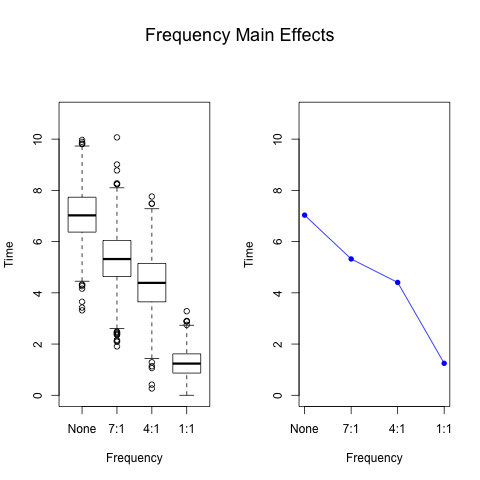

In [230]:
%%R
## Frequency Main Effect Plots
par(mfrow=c(1,2), oma = c(0,0,3,0)) 
boxplot(Time ~ Frequency, xlab = "Frequency", ylab = "Time", ylim = c(0,11))
me_freq <- aggregate(x = Time, by = list(Frequency), FUN = mean)$x
plot(x = 0:3, y = me_freq, type = "l", col = "blue", xlab = "Frequency", ylab = "Time", xaxt = "n", ylim = c(0,11))
points(x = 0:3, y = me_freq, pch = 16, col = "blue")
axis(side = 1, at = 0:3, labels = c("None", "7:1", "4:1", "1:1"))
mtext("Frequency Main Effects", outer = TRUE, cex = 1.5)

In [206]:
%%R
# Aggregated Frequency Means
print(paste("No ads -- ", round(me_freq[1], 2), sep = ""))
print(paste("7:1 frequency -- ", round(me_freq[2], 2), sep = ""))
print(paste("4:1 frequency -- ", round(me_freq[3], 2), sep = ""))
print(paste("1:1 frequency -- ", round(me_freq[4], 2), sep = ""))

[1] "No ads -- 7.03"
[1] "7:1 frequency -- 5.32"
[1] "4:1 frequency -- 4.41"
[1] "1:1 frequency -- 1.25"


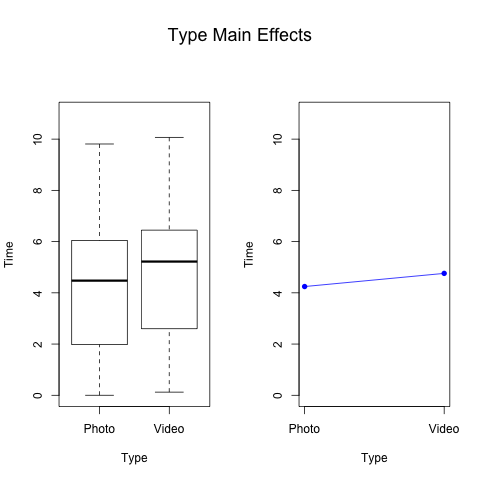

In [231]:
%%R
## Type Main Effect Plots
par(mfrow=c(1,2), oma = c(0,0,3,0)) 
boxplot(Time ~ Type, xlab = "Type", ylab = "Time", ylim = c(0,11))
me_type <- aggregate(x = Time, by = list(Type), FUN = mean)$x
plot(x = 1:2, y = me_type, type = "l", col = "blue", xlab = "Type", ylab = "Time", xaxt = "n", ylim = c(0,11))
points(x = 1:2, y = me_type, pch = 16, col = "blue")
axis(side = 1, at = 1:2, labels = c("Photo", "Video"))
mtext("Type Main Effects", outer = TRUE, cex = 1.5)

In [208]:
%%R
# Aggregated Time Means
print(paste("Photo -- ", round(me_type[1], 2), sep = ""))
print(paste("Video -- ", round(me_type[2], 2), sep = ""))

[1] "Photo -- 4.25"
[1] "Video -- 4.76"


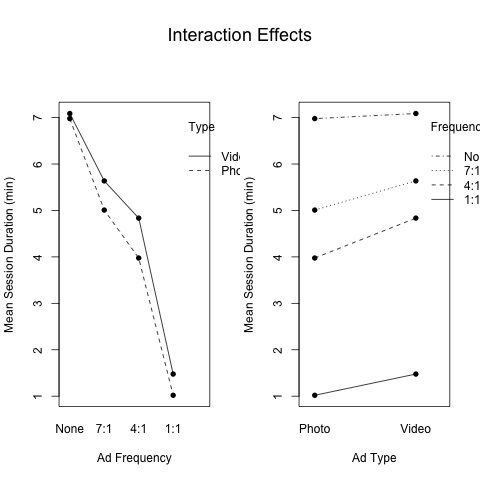

In [232]:
%%R
## Interaction Plots
ie <- aggregate(x = Time, by = list(Frequency, Type), FUN = mean)
par(mfrow=c(1,2), oma = c(0,0,3,0)) 
interaction.plot(Frequency, Type, Time, main = "", ylab = "Mean Session Duration (min)", xlab = "Ad Frequency")
points(x=c(1,1,2,2,3,3,4,4), y = c(ie$x[1], ie$x[5], ie$x[2], ie$x[6], ie$x[3], ie$x[7], ie$x[4], ie$x[8]), pch = 16)
interaction.plot(Type, Frequency, Time, main = "", ylab = "Mean Session Duration (min)", xlab = "Ad Type")
points(x=c(1,1,1,1,2,2,2,2), y = c(ie$x[1], ie$x[2], ie$x[3], ie$x[4], ie$x[5], ie$x[6], ie$x[7], ie$x[8]), pch = 16)
mtext("Interaction Effects", outer = TRUE, cex = 1.5)

In [216]:
%%R
## Marginal Time Means
print(ie)

  Group.1 Group.2        x
1    None   Photo 6.977854
2     7:1   Photo 5.008560
3     4:1   Photo 3.975815
4     1:1   Photo 1.019292
5    None   Video 7.087786
6     7:1   Video 5.636176
7     4:1   Video 4.834985
8     1:1   Video 1.476534


In [218]:
%%R
## Linear model to evaluate the significance of main and interaction effects
model <- lm(Time ~ Frequency * Type)
summary(model)


Call:
lm(formula = Time ~ Frequency * Type)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7276 -0.5474 -0.0020  0.5499  4.4332 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)             6.97785    0.02824  247.104  < 2e-16 ***
Frequency7:1           -1.96929    0.03994  -49.312  < 2e-16 ***
Frequency4:1           -3.00204    0.03994  -75.173  < 2e-16 ***
Frequency1:1           -5.95856    0.03994 -149.206  < 2e-16 ***
TypeVideo               0.10993    0.03994    2.753  0.00592 ** 
Frequency7:1:TypeVideo  0.51768    0.05648    9.166  < 2e-16 ***
Frequency4:1:TypeVideo  0.74924    0.05648   13.266  < 2e-16 ***
Frequency1:1:TypeVideo  0.34731    0.05648    6.150 8.14e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.893 on 7992 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8496 
F-statistic:  6455 on 7 and 7992 DF,  p-value: < 2.2e-16



In [219]:
%%R
## ANOVA to evaluate the significance of main and interaction effects
anova(model)

Analysis of Variance Table

Response: Time
                 Df Sum Sq Mean Sq   F value    Pr(>F)    
Frequency         3  35353 11784.3 14778.187 < 2.2e-16 ***
Type              1    527   527.3   661.318 < 2.2e-16 ***
Frequency:Type    3    149    49.8    62.398 < 2.2e-16 ***
Residuals      7992   6373     0.8                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
